# Showcase

In [1]:
import sys
import pandas as pd
import numpy as np

import seaborn as sns

import plotwidgets
import plotwidgets as wp


import importlib
importlib.reload(plotwidgets)

#wp.set_options(max_figure_width=4)

#wp.set_options(x=None, y=None, col=None, graphics=[sns.scatterplot, sns.boxplot], theme={'style': 'darkgrid', 'palette': 'colorblind'})

%config InlineBackend.figure_format = 'retina'

## Dummy data

In [2]:
data = sns.load_dataset('penguins')

# l = [data]
# data_copy = data.loc[data.species == 'Adelie', :]
# data_copy['species'] = 'foo'
# l.append(data_copy)
# data_copy = data.loc[data.species == 'Adelie', :]
# data_copy['species'] = 'bar'
# l.append(data_copy)
# # data_copy = data.loc[data.species == 'Adelie', :]
# # data_copy['species'] = 'baz'
# # l.append(data_copy)
# data = pd.concat(l)

data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Examples

In [3]:
wp.seaborn(data)

Output()

Output()

Output()

Output()

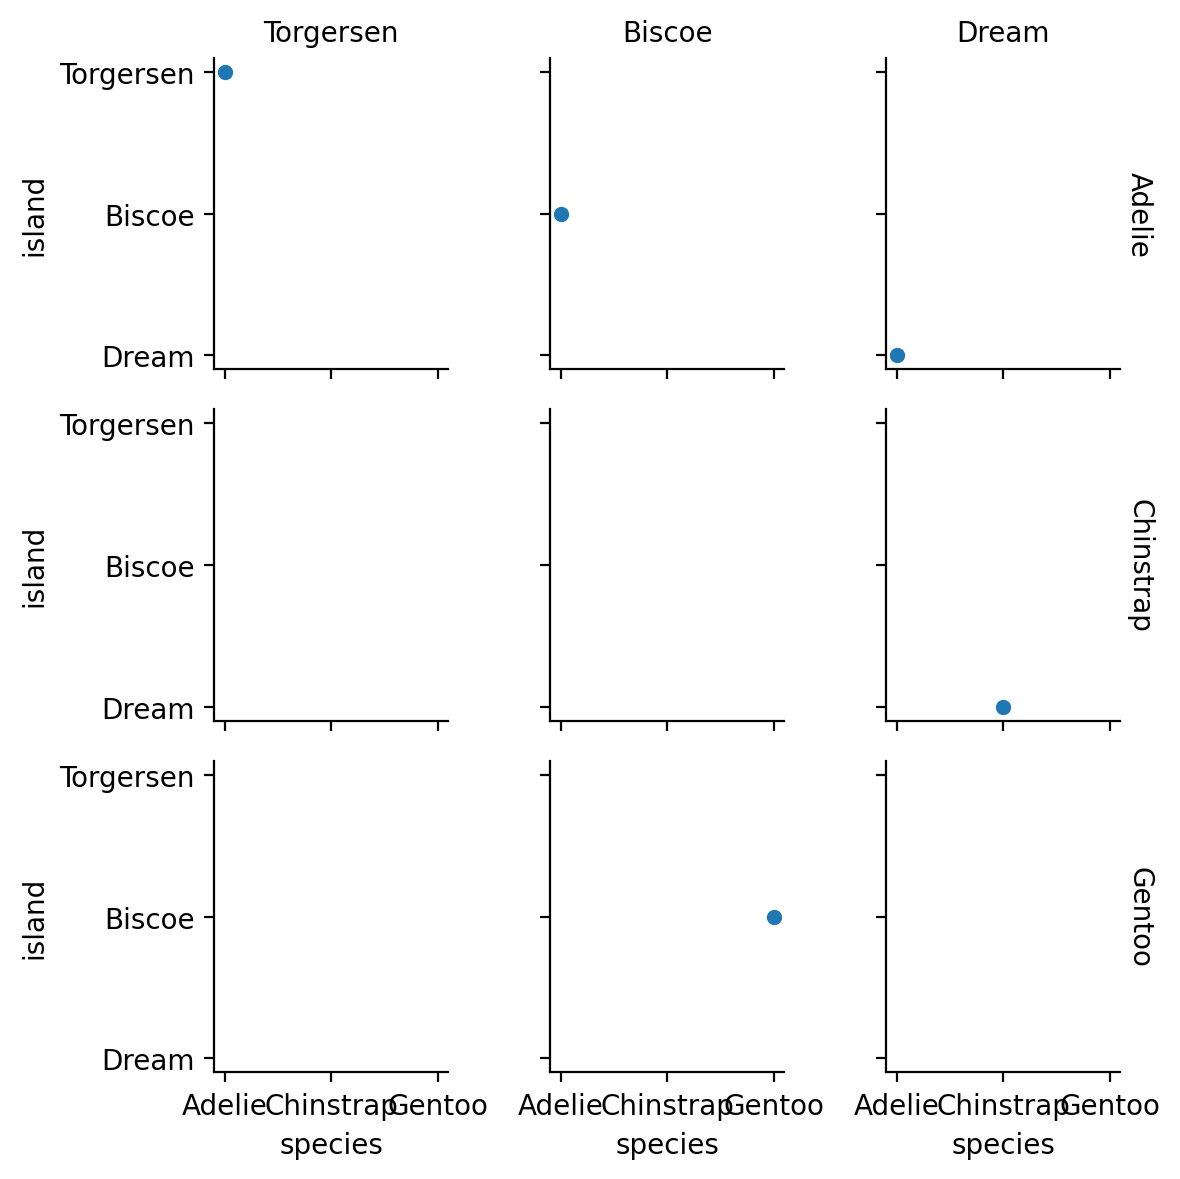

In [35]:
import seaborn as sns
sns.set_style({'style': 'darkgrid', 'palette': 'viridis'})                             
g = sns.relplot(data, x='species', y='island', col='island', row='species', height=2, kind='scatter', 
                facet_kws=dict(margin_titles=True))
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout() ;

In [4]:
def find_facet_size(min_sq_size, max_sq_size):

    sq_size = (min_sq_size + max_sq_size) / 2
    if abs(sq_size - min_sq_size) < 0.01 or abs(sq_size - max_sq_size) < 0.01:
        return sq_size
    sq_per_row = OPTIONS['max_figure_width'] // sq_size
    sq_per_col = OPTIONS['max_figure_height'] // sq_size
    sq_fitted = sq_per_row * sq_per_col
    if sq_fitted < col_cats:
        return find_facet_size(min_sq_size, sq_size)
    else:
        return find_facet_size(sq_size, max_sq_size)

from math import sqrt
col_cats = 3
OPTIONS = {}
OPTIONS['max_figure_width'] = 10
OPTIONS['max_figure_height'] = 5

max_square_size = sqrt(OPTIONS['max_figure_height'] * OPTIONS['max_figure_width'] / col_cats)

find_facet_size(0, max_square_size)


3.340938158288254

In [5]:
import math
math.sqrt(5 * 10 / 3)

4.08248290463863

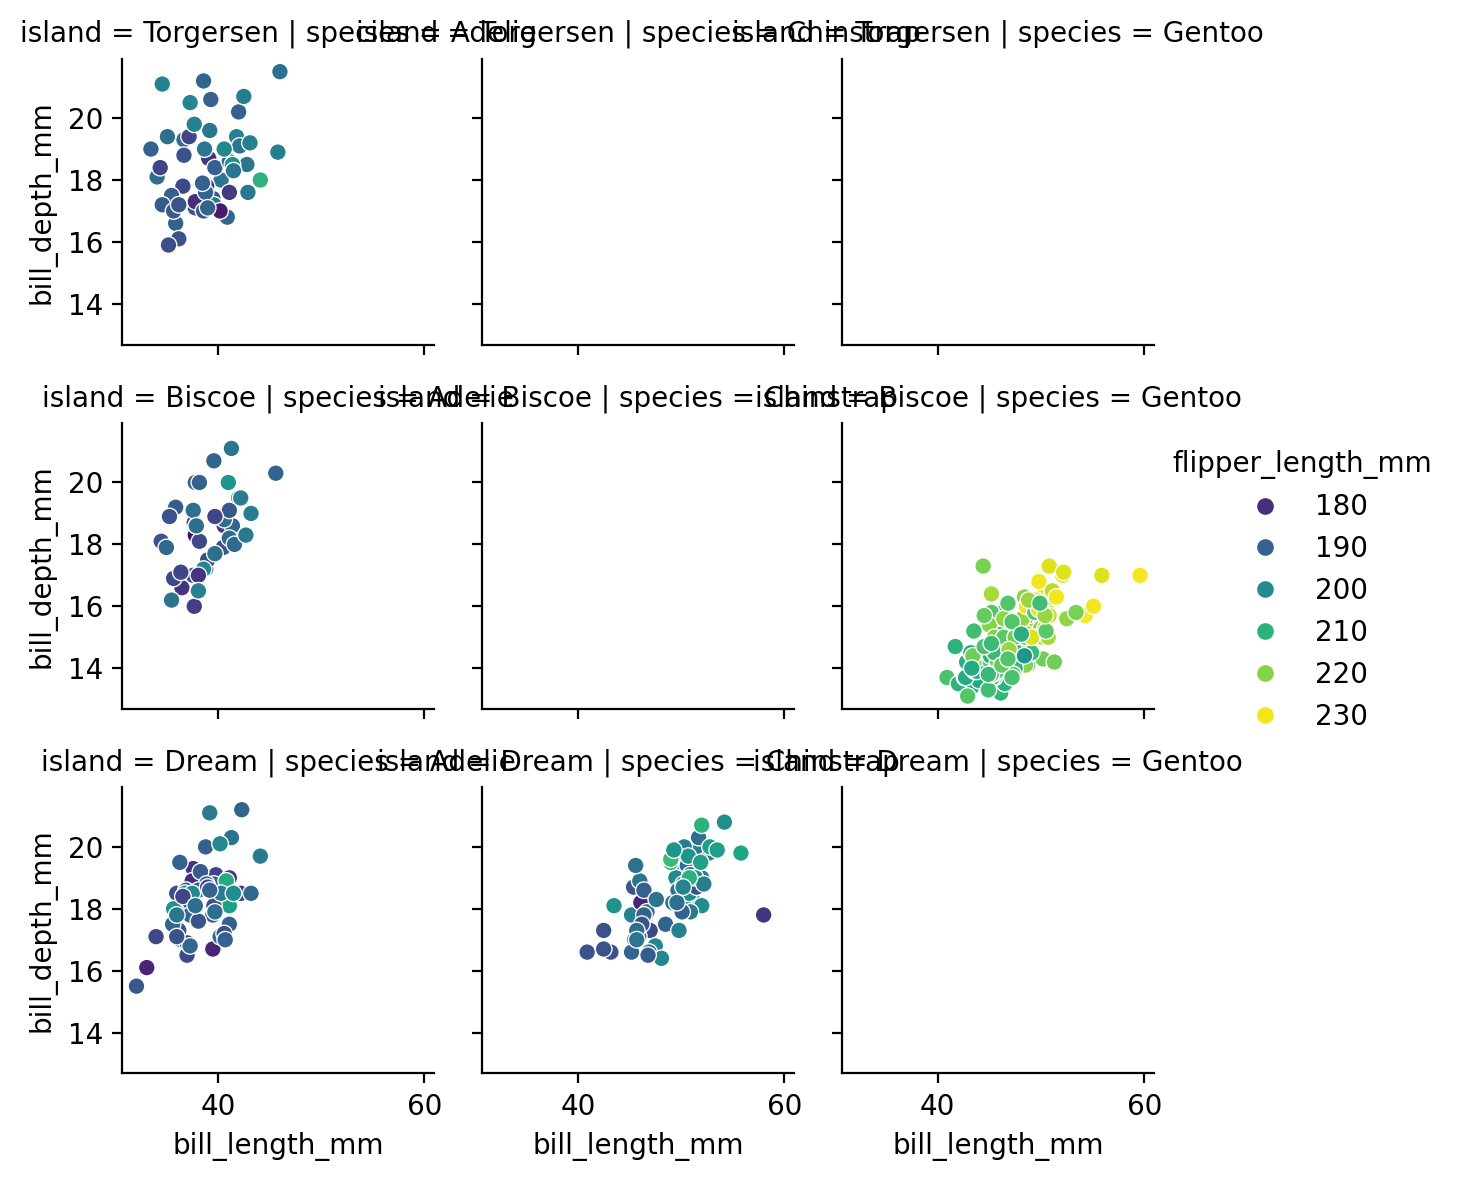

In [6]:
import seaborn as sns
sns.set_style({'style': 'darkgrid', 'palette': 'viridis'})                             
sns.relplot(data, x='bill_length_mm', y='bill_depth_mm', hue='flipper_length_mm', 
            row='island', col='species', 
            palette='viridis', kind='scatter', height=2) ;

In [7]:
from ipywidgets import interact
import matplotlib.pyplot as plt

@interact
def show_more_than(col1='bill_length_mm', min_col1=55, col2='bill_depth_mm', min_col2=15):
    with pd.option_context('display.max_rows', None,):
        display(data.loc[(data[col1] > min_col1) & (data[col2] > min_col2)])
    

interactive(children=(Text(value='bill_length_mm', description='col1'), IntSlider(value=55, description='min_c…

In [29]:
import matplotlib.colors
@interact
def show_more_than(col1=['bill_length_mm', 'bill_depth_mm'], min_col1=55, col2='bill_depth_mm', min_col2=15):
    df = data.loc[(data[col1] > min_col1) & (data[col2] > min_col2)]
    norm =  matplotlib.colors.Normalize(
        vmin=30,#data['bill_length_mm'].min(), 
        vmax=60,#data['bill_length_mm'].max()
    )
    ax = sns.scatterplot(df, x='flipper_length_mm', y='body_mass_g', hue='bill_length_mm', hue_norm=norm,
                    # vmin=10, #data['bill_length_mm'].min(), 
                    # vmax=20, #data['bill_length_mm'].max()
                   )
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    a, b = data['flipper_length_mm'].min(), data['flipper_length_mm'].max()
    a -= abs(a - b)*.01
    b += abs(a - b)*.01
    plt.xlim(a, b)
    a, b = data.body_mass_g.min(), data.body_mass_g.max()
    a -= a*0.03
    b += b*0.03
    # ax.collections[0].set_clim(df['bill_depth_mm'].min(), df['bill_depth_mm'].max()) 

    
    plt.ylim(a, b)    

interactive(children=(Dropdown(description='col1', options=('bill_length_mm', 'bill_depth_mm'), value='bill_le…

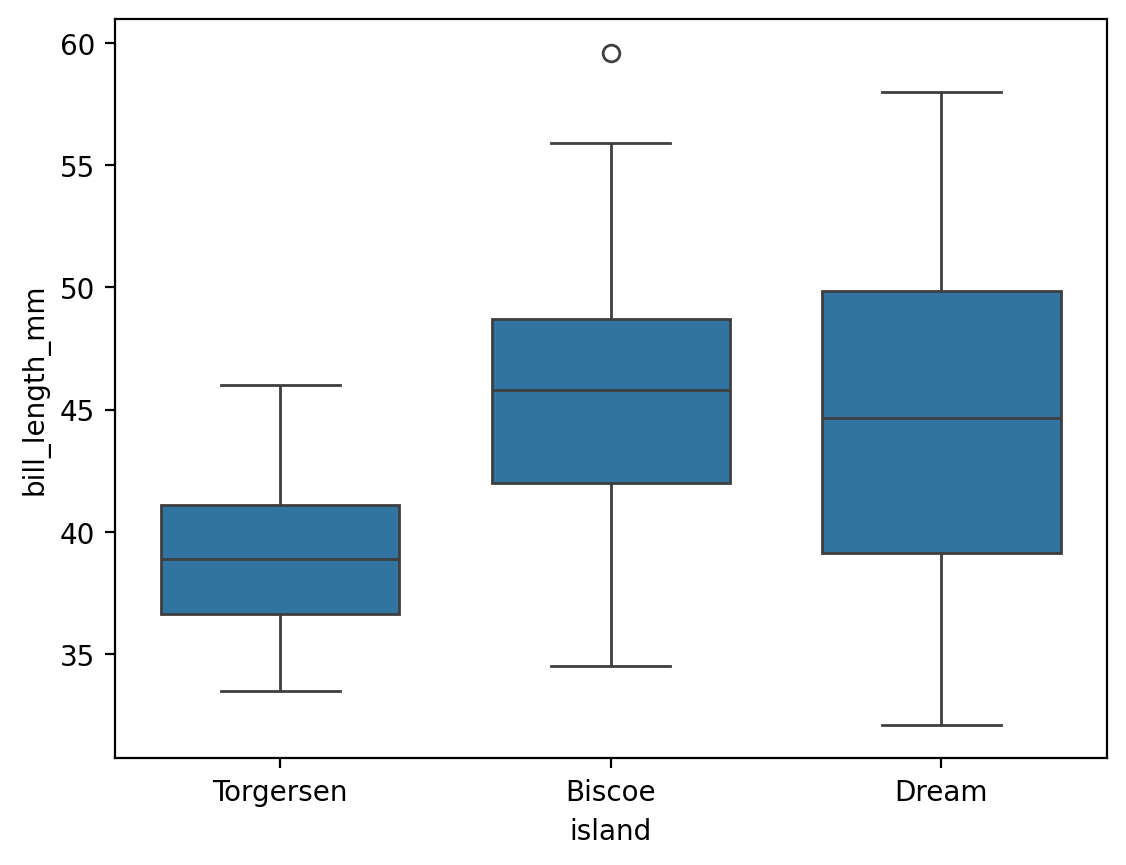

In [11]:
import seaborn as sns
sns.set_style({'style': 'darkgrid', 'palette': 'viridis'})                             
sns.boxplot(data, x='island', y='bill_length_mm', hue=None, gap=0.1, dodge=True) ;

In [13]:
s = """
asdfa

<details>
<summary>Show code for plot</summary>



```python
akljsdf alsdf asd
```

</details>

"""
Markdown(s)

NameError: name 'Markdown' is not defined

In [14]:
wp.seaborn(data, x='species', y='body_mass_g', hue='island', plot='boxplot',
           col='island', row='sex',
          )

TypeError: seaborn() got an unexpected keyword argument 'plot'

In [15]:
from ipywidgets import interact, interact_manual
@interact(plot=[('scatter', sns.scatterplot), ('boxplot', sns.boxplot)], 
                 x=['a', 'b', 'c'],
                )
def h(**kwargs):
    print(kwargs)

interactive(children=(Dropdown(description='plot', options=(('scatter', <function scatterplot at 0x12fef0860>)…

In [16]:
import matplotlib.pyplot as plt

In [17]:
#%matplotlib inline
import ipywidgets as widgets

slider = widgets.IntSlider(value=5, min=1, max=10, step=1)
#Create your button.
button = widgets.Button(description="Plot")
#Output field.
output = widgets.Output()

#function to handle input.
def showOutput(btn):
    output.clear_output()
    return_value = slider.value
    fig = plt.plot(return_value, return_value)
    with output:
        plt.show()
        # print(return_value)

button.on_click(showOutput)

ui = widgets.HBox([slider, button]), widgets.HBox([output])
display(*ui)


In [18]:
import ipywidgets as widgets
slider = widgets.IntSlider(value=5, min=1, max=10, step=1)
#Create your button.
button = widgets.Button(description="Go")
#Output field.
output = widgets.Output()

#function to handle input.
def showOutput(btn):
    output.clear_output()
    return_value = slider.value
    with output:
        print(return_value)

button.on_click(showOutput)

ui = widgets.HBox([slider, button, output])
ui

In [19]:
from ipywidgets import interactive
from IPython.display import display

my_widget = interactive(h, plot=[('scatter', sns.scatterplot), ('boxplot', sns.boxplot)], __manual=True)
display(my_widget)

interactive(children=(Dropdown(description='plot', options=(('scatter', <function scatterplot at 0x12fef0860>)…

In [20]:
wp.seaborn(data, x='bill_length_mm', y='body_mass_g', hue='body_mass_g', #plot='boxplot',
           col='species'
          )


Output()

Output()

Output()

Output()

In [21]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# cmap= sns.color_palette('ch:', as_cmap= True)
# sm = plt.cm.ScalarMappable(cmap= cmap, norm=mpl.colors.Normalize())

wp.seaborn(data, #plot='scatterplot', 
           x='bill_length_mm', y='body_mass_g', hue='body_mass_g', col='species')

Output()

Output()

Output()

Output()

In [22]:
wp.seaborn(data, x='bill_length_mm', y='bill_depth_mm', hue='sex', #plot='scatterplot', 
          # palette='colorblind'
          )

Output()

Output()

Output()

Output()

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

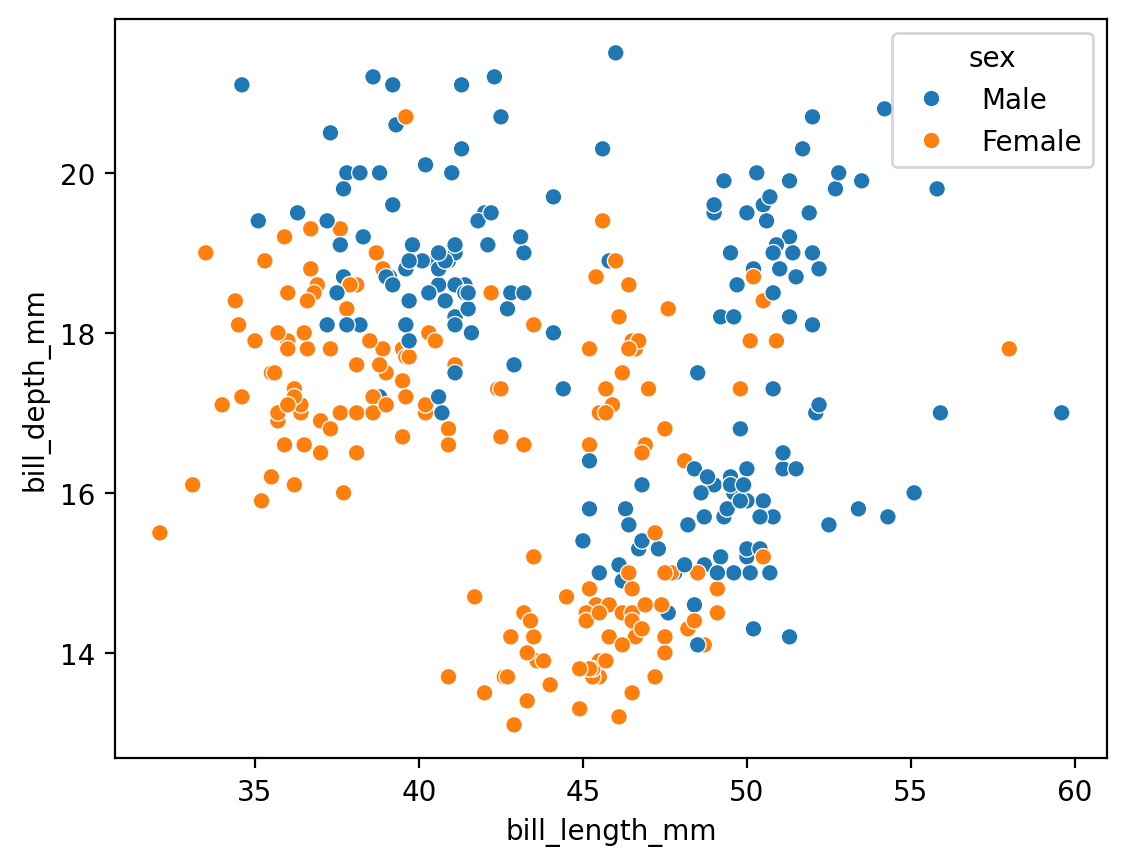

In [23]:
sns.scatterplot(data, x='bill_length_mm', y='bill_depth_mm', hue='sex', 
              #  palette='colorblind'
               )


In [24]:
wp.seaborn(data=data, x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g', 
           # style='sex', 
           # size='body_mass_g', 
           col='species', row='island',
          wrap=3, theme={'palette': 'Set1'})

TypeError: seaborn() got an unexpected keyword argument 'wrap'

In [25]:
wp.seaborn(data, plot='boxplot', x='species', y='bill_depth_mm')

TypeError: seaborn() got an unexpected keyword argument 'plot'

In [26]:
wp.seaborn(data, plot='histplot', x='bill_depth_mm', hue='sex', row='species', col='island')

TypeError: seaborn() got an unexpected keyword argument 'plot'

In [27]:
wp.seaborn(data, x='bill_length_mm', y='bill_depth_mm', row='species', col='island')

Output()

Output()

Output()

Output()

In [28]:
wp.seaborn(data=data, x='bill_length_mm', y='bill_depth_mm')

Output()

Output()

Output()

Output()

In [30]:
wp.seaborn(data=data, x='bill_length_mm', y='bill_depth_mm', graphics=[sns.lmplot])

TypeError: seaborn() got an unexpected keyword argument 'graphics'

In [31]:
wp.seaborn(data, x='bill_length_mm', y='bill_depth_mm', hue='species', graphics=[sns.lmplot])

TypeError: seaborn() got an unexpected keyword argument 'graphics'

In [32]:
wp.seaborn(data, x='bill_length_mm', y='bill_depth_mm', graphics=[sns.scatterplot])

TypeError: seaborn() got an unexpected keyword argument 'graphics'

In [33]:
wp.seaborn(data, x='bill_length_mm', y='bill_depth_mm', hue='species', graphics=[sns.kdeplot])

TypeError: seaborn() got an unexpected keyword argument 'graphics'

In [34]:
wp.seaborn(data, x='bill_length_mm', y='bill_depth_mm', hue='sex', plot='scatterplot', palette='colorblind')

TypeError: seaborn() got an unexpected keyword argument 'plot'

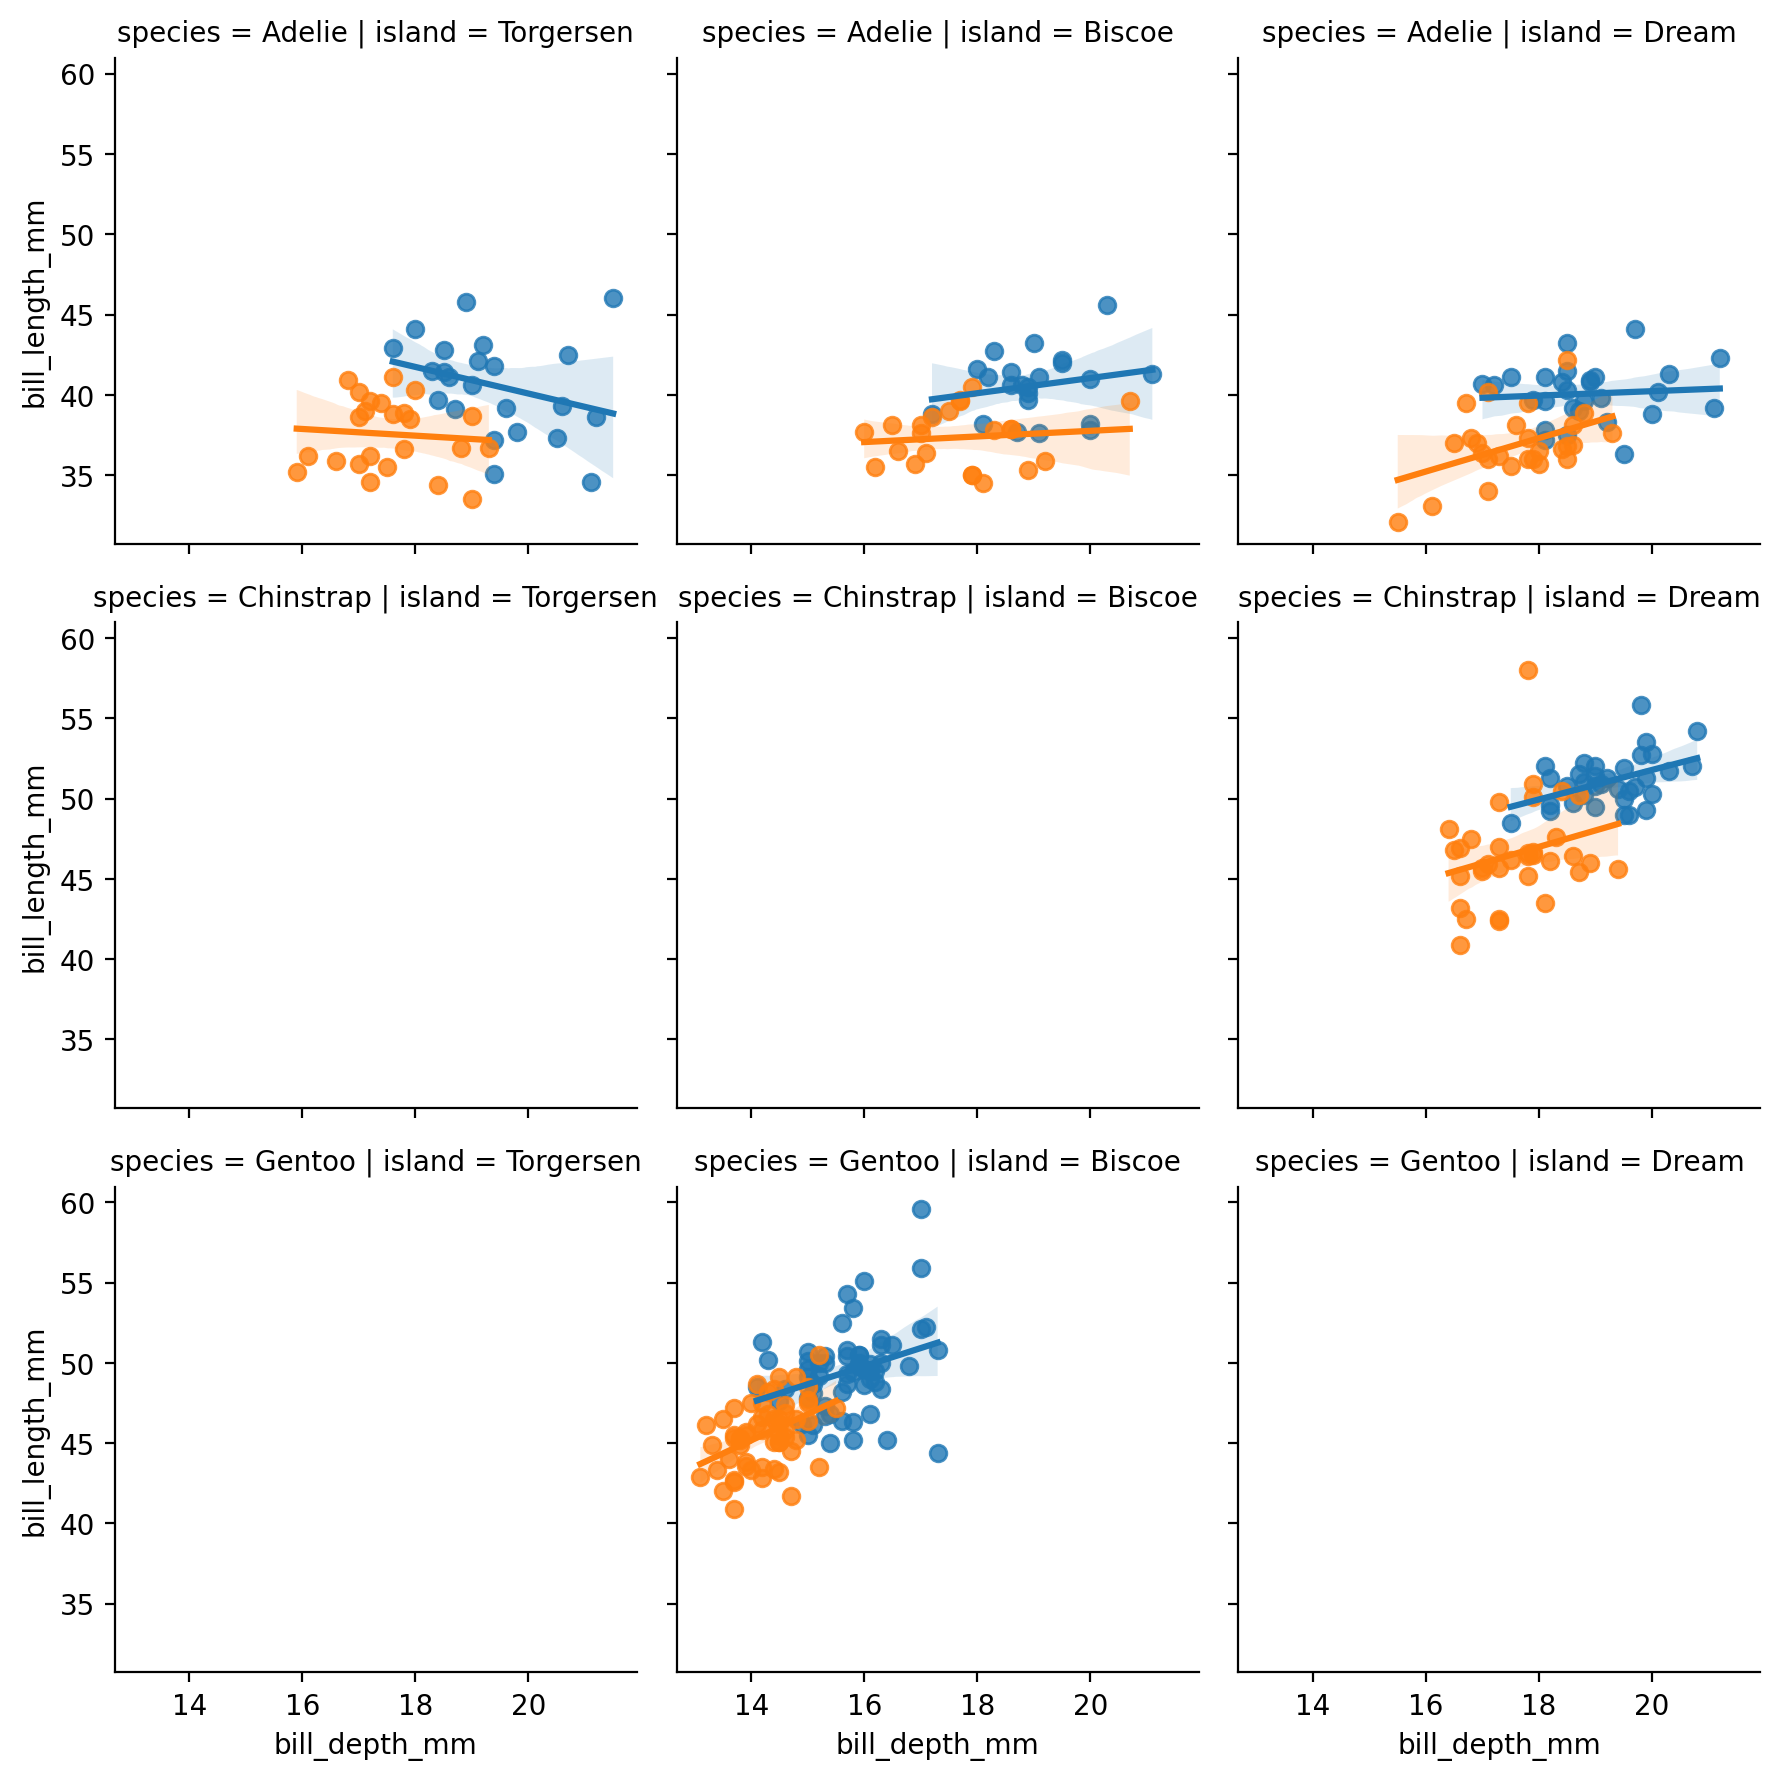

In [36]:
g = sns.FacetGrid(data, row='species', col='island', hue='sex')
g.map_dataframe(sns.regplot, x='bill_depth_mm', y='bill_length_mm')